In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
PATH_TO_GRAPH = r'models/real/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = r'data/udacity_label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [6]:
IMAGE_SIZE = (12, 8)

SCORES
[0.9907425  0.00456791 0.00422765 0.00415399 0.00388567 0.0034745
 0.00341849 0.00330526 0.00319495 0.00315105]
CLASSES
[1. 4. 4. 1. 1. 3. 3. 4. 3. 3.]


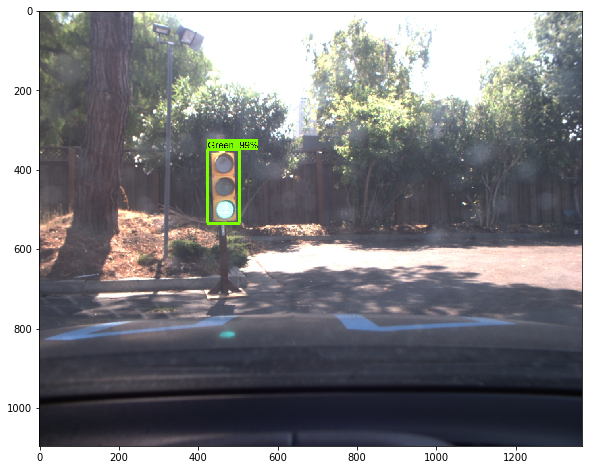

SCORES
[0.99393773 0.00333033 0.00327977 0.00298553 0.00293043 0.00277372
 0.00266278 0.00264387 0.0026359  0.00258523]
CLASSES
[1. 1. 1. 4. 1. 4. 3. 4. 2. 2.]


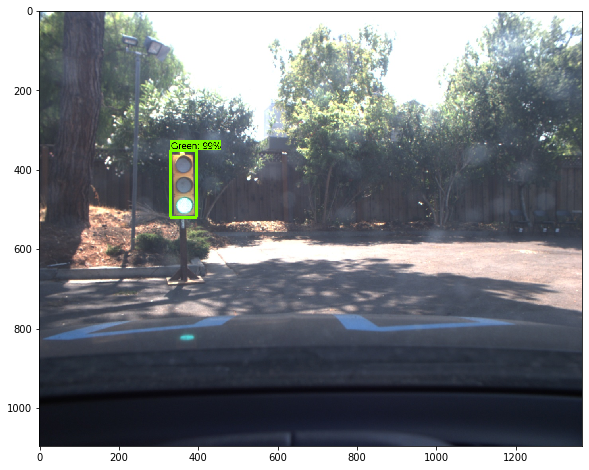

SCORES
[0.00309738 0.00288008 0.00282221 0.00276413 0.00271486 0.00264799
 0.00258186 0.00252903 0.00247462 0.0024485 ]
CLASSES
[2. 3. 2. 3. 1. 2. 4. 2. 1. 2.]


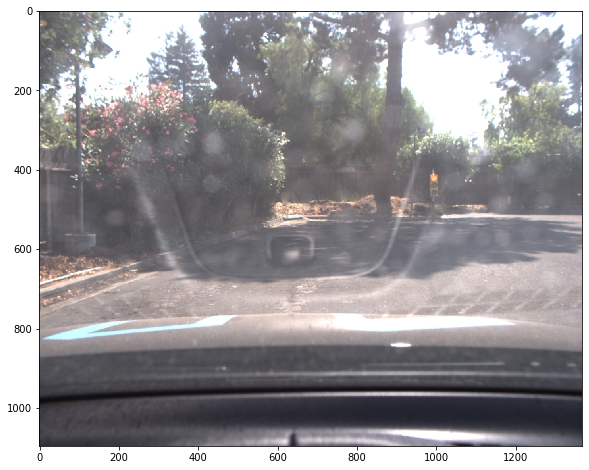

SCORES
[0.9951035  0.00308886 0.00303121 0.00295722 0.00292646 0.00277096
 0.0027684  0.00273916 0.00272946 0.00265861]
CLASSES
[1. 2. 3. 3. 1. 2. 1. 2. 4. 2.]


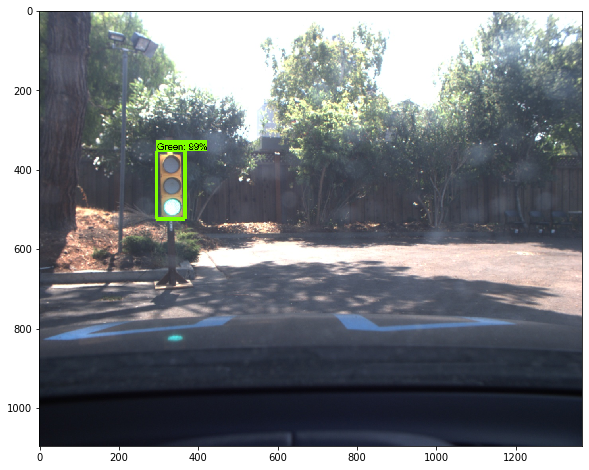

SCORES
[0.00312157 0.00276793 0.00274506 0.00262185 0.00254163 0.00252493
 0.00243382 0.00239377 0.00238768 0.00232909]
CLASSES
[4. 4. 2. 1. 2. 4. 3. 3. 2. 4.]


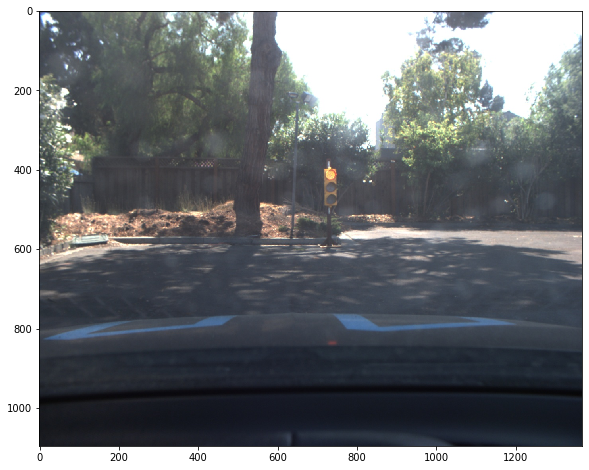

SCORES
[0.00352381 0.00348133 0.00320407 0.00320338 0.00315178 0.00308017
 0.00302286 0.00298589 0.00289301 0.00288243]
CLASSES
[1. 3. 1. 2. 4. 4. 1. 1. 1. 1.]


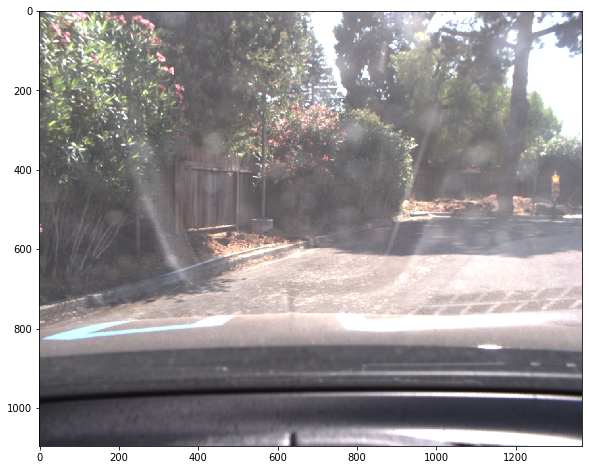

SCORES
[0.9789155  0.00395955 0.00346413 0.00344179 0.00343957 0.00316337
 0.0029649  0.00284782 0.00279664 0.00278737]
CLASSES
[1. 3. 3. 3. 3. 3. 3. 3. 1. 2.]


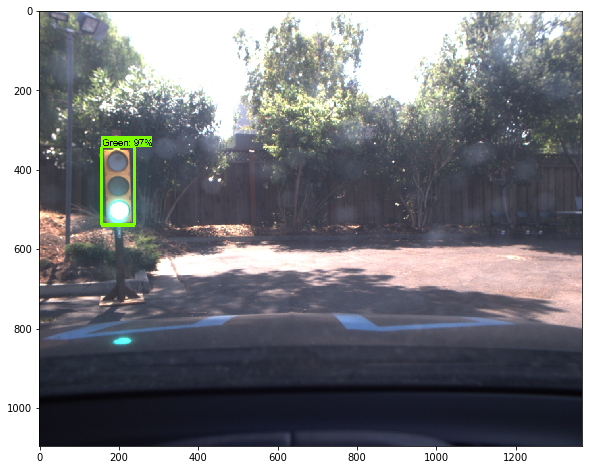

SCORES
[0.9981627  0.00371163 0.00307261 0.00287508 0.00269708 0.00251338
 0.00237479 0.00237146 0.00236355 0.00231952]
CLASSES
[1. 3. 3. 1. 3. 3. 2. 1. 1. 2.]


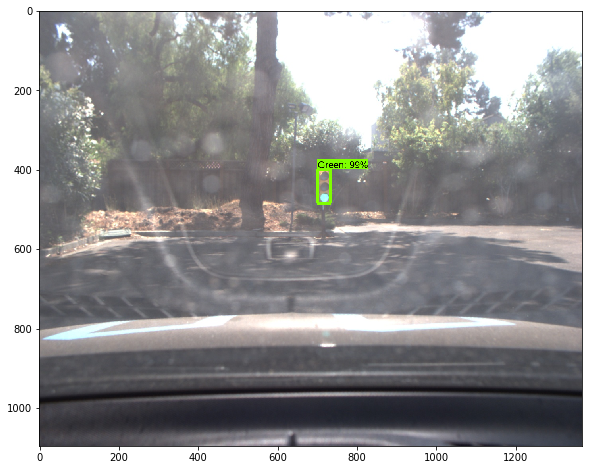

SCORES
[0.9993319  0.00357778 0.00285866 0.00276172 0.00271959 0.00265757
 0.00262325 0.0025776  0.00256574 0.00247762]
CLASSES
[1. 4. 4. 3. 2. 4. 2. 1. 2. 2.]


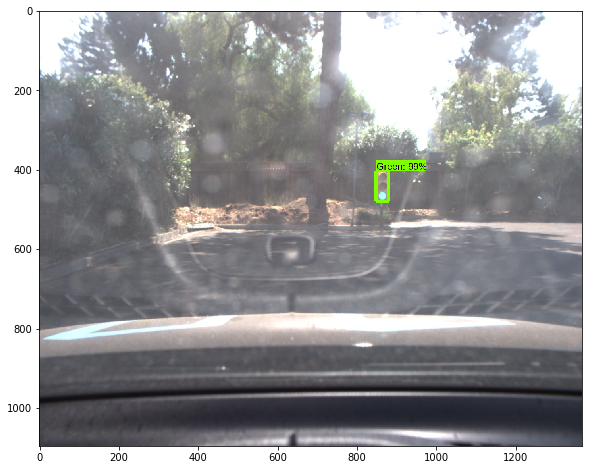

SCORES
[0.9990895  0.00277277 0.00253619 0.00243636 0.00240076 0.00235877
 0.00235172 0.00234508 0.0023384  0.0023075 ]
CLASSES
[1. 2. 3. 1. 3. 4. 2. 2. 1. 2.]


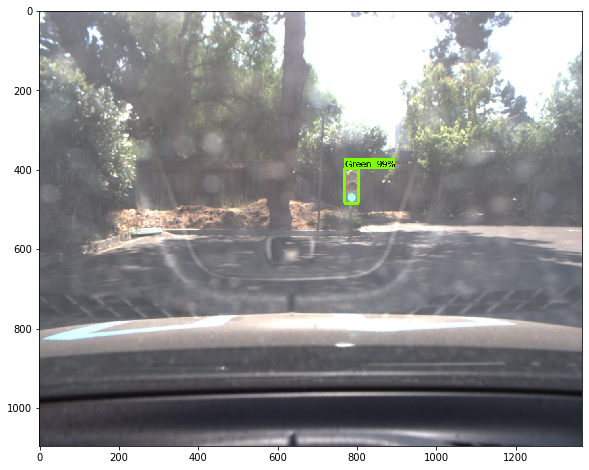

SCORES
[0.99277735 0.00358837 0.00320385 0.00283418 0.00281113 0.00277786
 0.00276998 0.00272588 0.00270871 0.00270725]
CLASSES
[1. 1. 4. 3. 2. 3. 1. 3. 2. 1.]


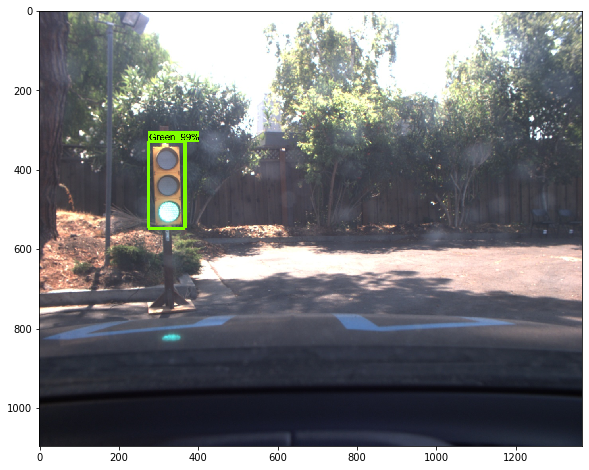

In [7]:
PATH_TO_IMGS = r'data/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break